In [2]:
import pandas as pd

In [3]:
corpus = pd.read_csv("../songs_25.csv")

In [4]:
corpus.head(2)

,Unnamed: 0,Unnamed: 0.1,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS,stemmed_text
0,0,0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True,mad little sad mean other rainy gloomy funny d...,sometim when i 'm mad there 's a part of me t...
1,1,1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True,record la la la la red la la la la dead la la ...,tri to sneak out without say with my loudest ...


## Genre1 als Labels und Text als Features

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre1"])
vector  = TfidfVectorizer().fit_transform(corpus["text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)



In [9]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = SVC(gamma='auto')
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.599.

Der F1-score für die Klassifizierung mit SVM ist 0.601.


In [10]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0])}

grid = GridSearchCV(SVC(gamma='auto'), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.5987.


In [11]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.599.

Der F1-score für die Klassifizierung mit SVM ist 0.601.


In [61]:
classify_svm(C=0.5, cv=10)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.59.

Der F1-score für die Klassifizierung mit SVM ist 0.606.


In [62]:
classify_svm(C=0.5, cv=20)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.592.

Der F1-score für die Klassifizierung mit SVM ist 0.606.


In [63]:
classify_svm(C=0.5, cv=50)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.595.

Der F1-score für die Klassifizierung mit SVM ist 0.606.


In [64]:
classify_svm(C=0.5, cv=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.599.

Der F1-score für die Klassifizierung mit SVM ist 0.606.


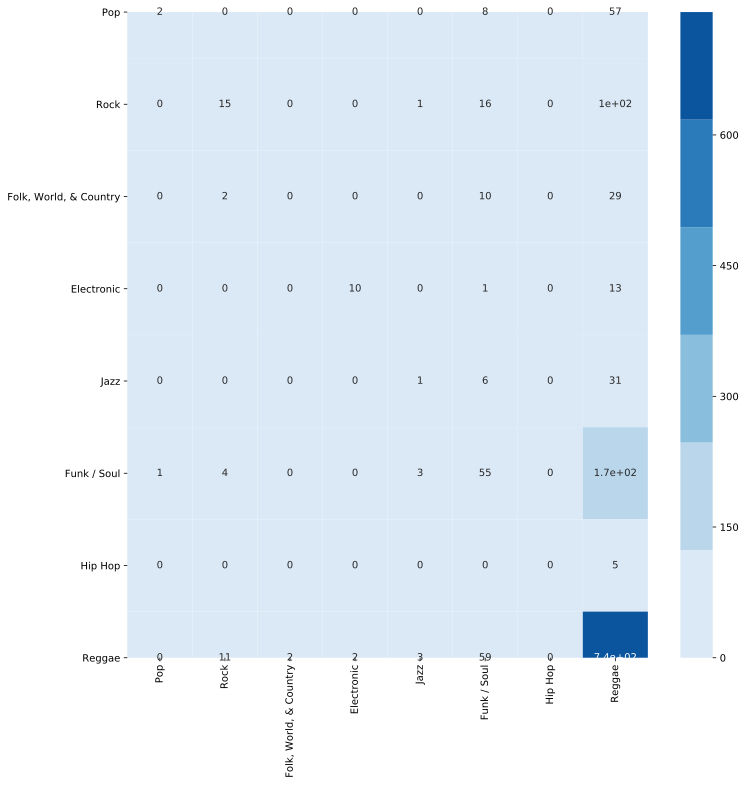

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

svm_classifier = LinearSVC(C=0.5)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre1"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                        precision    recall  f1-score   support

                   Pop       0.67      0.03      0.06        67
                  Rock       0.47      0.11      0.18       136
Folk, World, & Country       0.00      0.00      0.00        41
            Electronic       0.83      0.42      0.56        24
                  Jazz       0.12      0.03      0.04        38
           Funk / Soul       0.35      0.24      0.28       231
               Hip Hop       0.00      0.00      0.00         5
                Reggae       0.65      0.91      0.75       818

              accuracy                           0.61      1360
             macro avg       0.39      0.22      0.23      1360
          weighted avg       0.55      0.61      0.53      1360



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Genre2 als Labels und Text als Features

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre2"])
vector  = TfidfVectorizer().fit_transform(corpus["text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)



In [68]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.445.

Der F1-score für die Klassifizierung mit SVM ist 0.474.


In [71]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.4787.


In [72]:
classify_svm(C=0.5,cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.464.

Der F1-score für die Klassifizierung mit SVM ist 0.486.


In [73]:
classify_svm(C=0.5, cv=10)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.461.

Der F1-score für die Klassifizierung mit SVM ist 0.486.


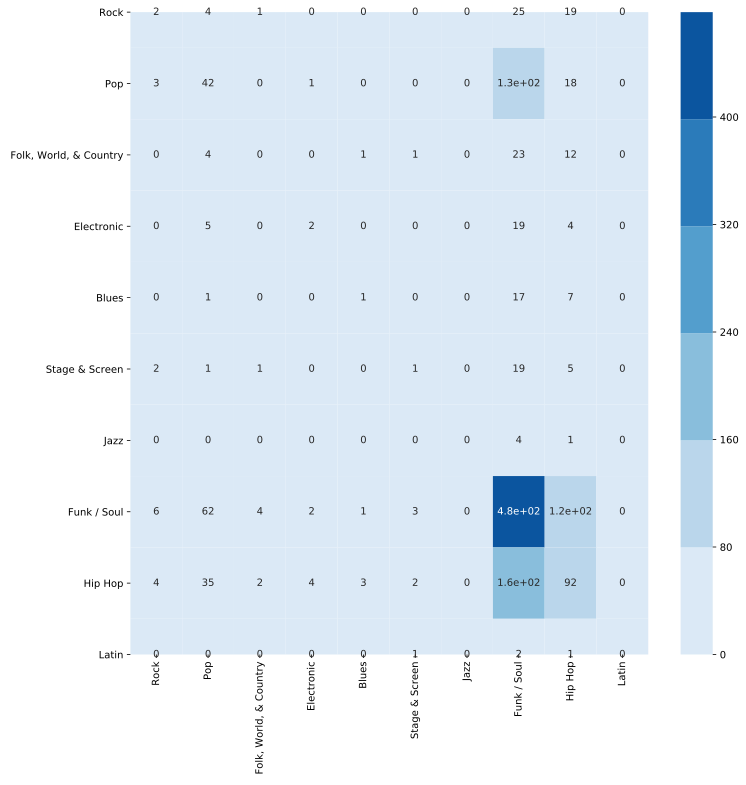

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=3.0)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre2"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                         precision    recall  f1-score   support

                   Rock       0.12      0.04      0.06        51
                    Pop       0.27      0.22      0.24       190
 Folk, World, & Country       0.00      0.00      0.00        41
             Electronic       0.22      0.07      0.10        30
                  Blues       0.17      0.04      0.06        26
         Stage & Screen       0.12      0.03      0.05        29
                   Jazz       0.00      0.00      0.00         5
            Funk / Soul       0.55      0.71      0.61       678
                Hip Hop       0.33      0.30      0.31       306
                  Latin       0.00      0.00      0.00         4

               accuracy                           0.45      1360
              macro avg       0.18      0.14      0.15      1360
           weighted avg       0.40      0.45      0.42      1360



## Genre1 mit POS als Feature

In [77]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre1"])
vector  = TfidfVectorizer().fit_transform(corpus["POS"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)


In [78]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.563.

Der F1-score für die Klassifizierung mit SVM ist 0.571.


In [92]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.5903.


In [87]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.584.

Der F1-score für die Klassifizierung mit SVM ist 0.593.


In [88]:
classify_svm(C=0.5, cv=10)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.58.

Der F1-score für die Klassifizierung mit SVM ist 0.593.


In [89]:
classify_svm(C=0.5, cv=20)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.584.

Der F1-score für die Klassifizierung mit SVM ist 0.593.


In [90]:
classify_svm(C=0.5, cv=50)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.587.

Der F1-score für die Klassifizierung mit SVM ist 0.593.


In [91]:
classify_svm(C=0.5, cv=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.588.

Der F1-score für die Klassifizierung mit SVM ist 0.593.


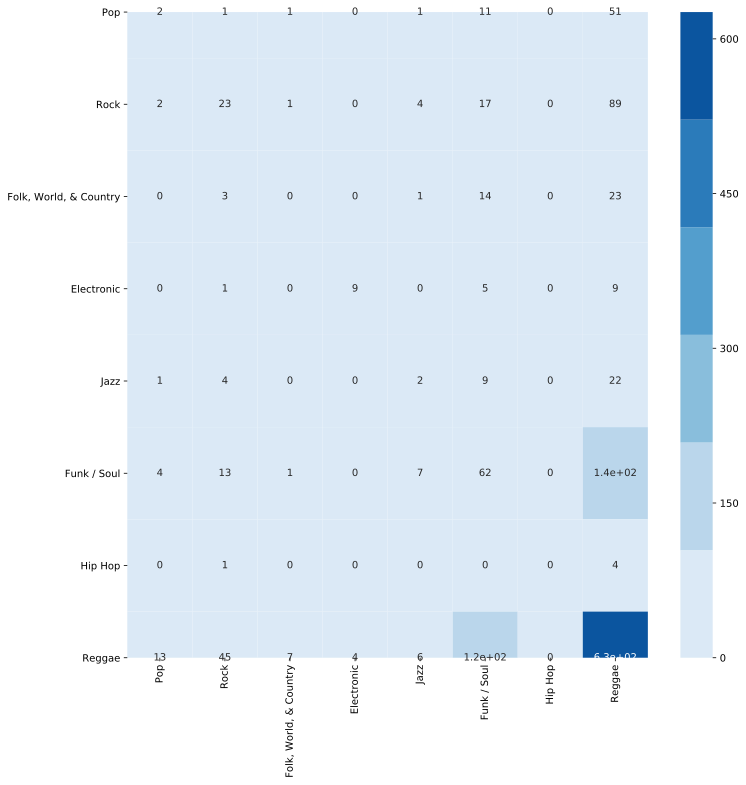

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=3.0)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre1"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                        precision    recall  f1-score   support

                   Pop       0.09      0.03      0.04        67
                  Rock       0.25      0.17      0.20       136
Folk, World, & Country       0.00      0.00      0.00        41
            Electronic       0.69      0.38      0.49        24
                  Jazz       0.10      0.05      0.07        38
           Funk / Soul       0.26      0.27      0.27       231
               Hip Hop       0.00      0.00      0.00         5
                Reggae       0.65      0.77      0.70       818

              accuracy                           0.53      1360
             macro avg       0.26      0.21      0.22      1360
          weighted avg       0.48      0.53      0.50      1360



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Genre2 mit POS als Feature

In [96]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre2"])
vector  = TfidfVectorizer().fit_transform(corpus["POS"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)


In [97]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.433.

Der F1-score für die Klassifizierung mit SVM ist 0.444.


In [98]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.47.


In [99]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.453.

Der F1-score für die Klassifizierung mit SVM ist 0.461.


In [100]:
classify_svm(C=0.5, cv=10)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.453.

Der F1-score für die Klassifizierung mit SVM ist 0.461.


In [101]:
classify_svm(C=0.5, cv=20)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.455.

Der F1-score für die Klassifizierung mit SVM ist 0.461.


In [102]:
classify_svm(C=0.5, cv=50)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.462.

Der F1-score für die Klassifizierung mit SVM ist 0.461.


In [103]:
classify_svm(C=0.5, cv=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.463.

Der F1-score für die Klassifizierung mit SVM ist 0.461.


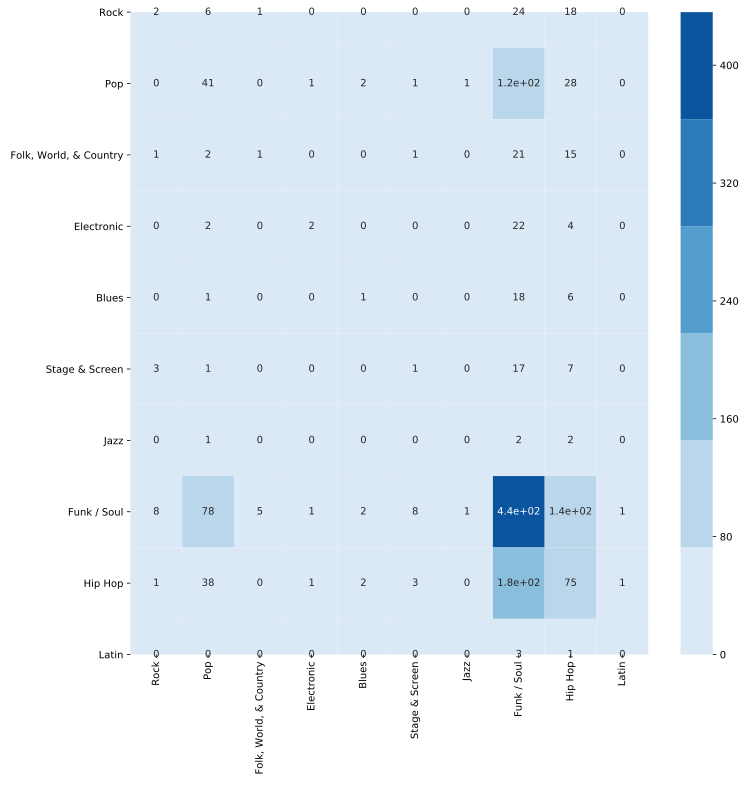

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=3.0)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre2"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                         precision    recall  f1-score   support

                   Rock       0.13      0.04      0.06        51
                    Pop       0.24      0.22      0.23       190
 Folk, World, & Country       0.14      0.02      0.04        41
             Electronic       0.40      0.07      0.11        30
                  Blues       0.14      0.04      0.06        26
         Stage & Screen       0.07      0.03      0.05        29
                   Jazz       0.00      0.00      0.00         5
            Funk / Soul       0.52      0.64      0.57       678
                Hip Hop       0.26      0.25      0.25       306
                  Latin       0.00      0.00      0.00         4

               accuracy                           0.41      1360
              macro avg       0.19      0.13      0.14      1360
           weighted avg       0.37      0.41      0.38      1360



## Genre1 und Stemming

In [132]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre1"])
vector  = TfidfVectorizer().fit_transform(corpus["stemmed_text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)

In [133]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.575.

Der F1-score für die Klassifizierung mit SVM ist 0.583.


In [134]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.598.


In [135]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.588.

Der F1-score für die Klassifizierung mit SVM ist 0.603.


In [114]:
classify_svm(C=0.5, cv=10)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.59.

Der F1-score für die Klassifizierung mit SVM ist 0.603.


In [115]:
classify_svm(C=0.5, cv=20)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.591.

Der F1-score für die Klassifizierung mit SVM ist 0.603.


In [116]:
classify_svm(C=0.5, cv=50)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.596.

Der F1-score für die Klassifizierung mit SVM ist 0.603.


In [117]:
classify_svm(C=0.5, cv=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.597.

Der F1-score für die Klassifizierung mit SVM ist 0.603.


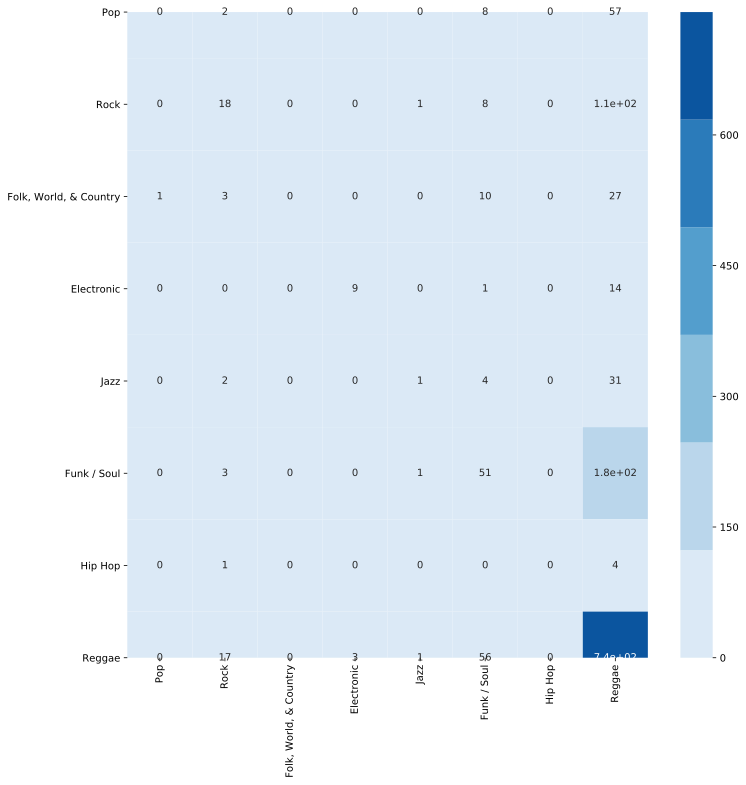

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=0.5)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre1"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                        precision    recall  f1-score   support

                   Pop       0.00      0.00      0.00        67
                  Rock       0.39      0.13      0.20       136
Folk, World, & Country       0.00      0.00      0.00        41
            Electronic       0.75      0.38      0.50        24
                  Jazz       0.25      0.03      0.05        38
           Funk / Soul       0.37      0.22      0.28       231
               Hip Hop       0.00      0.00      0.00         5
                Reggae       0.64      0.91      0.75       818

              accuracy                           0.60      1360
             macro avg       0.30      0.21      0.22      1360
          weighted avg       0.51      0.60      0.53      1360



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Genre2 + Stemming

In [120]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre2"])
vector  = TfidfVectorizer().fit_transform(corpus["stemmed_text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)

In [121]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.448.

Der F1-score für die Klassifizierung mit SVM ist 0.471.


In [123]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=10, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.4855.


In [124]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.463.

Der F1-score für die Klassifizierung mit SVM ist 0.485.


In [125]:
classify_svm(C=0.5, cv=10)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.463.

Der F1-score für die Klassifizierung mit SVM ist 0.485.


In [126]:
classify_svm(C=0.5, cv=20)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.466.

Der F1-score für die Klassifizierung mit SVM ist 0.485.


In [127]:
classify_svm(C=0.5, cv=50)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.474.

Der F1-score für die Klassifizierung mit SVM ist 0.485.


In [128]:
classify_svm(C=0.5, cv=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.478.

Der F1-score für die Klassifizierung mit SVM ist 0.485.


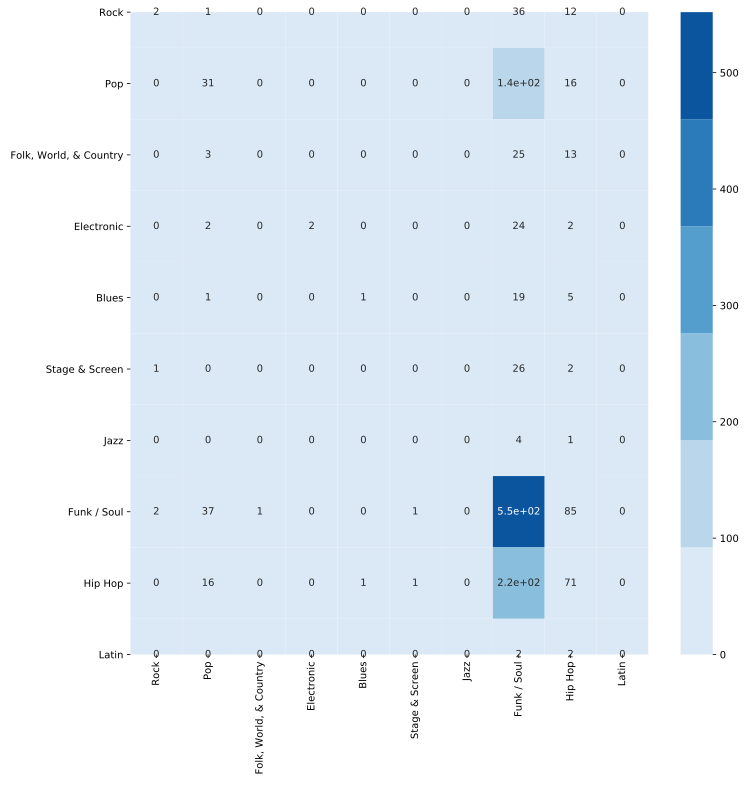

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=0.5)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre2"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                         precision    recall  f1-score   support

                   Rock       0.40      0.04      0.07        51
                    Pop       0.34      0.16      0.22       190
 Folk, World, & Country       0.00      0.00      0.00        41
             Electronic       1.00      0.07      0.12        30
                  Blues       0.50      0.04      0.07        26
         Stage & Screen       0.00      0.00      0.00        29
                   Jazz       0.00      0.00      0.00         5
            Funk / Soul       0.53      0.81      0.64       678
                Hip Hop       0.34      0.23      0.28       306
                  Latin       0.00      0.00      0.00         4

               accuracy                           0.48      1360
              macro avg       0.31      0.14      0.14      1360
           weighted avg       0.43      0.48      0.42      1360



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Mit neuem Datensatz, date als Label  und Text als Feature

In [5]:
import pandas as pd 


In [6]:
corpus = pd.read_csv("../songs_plus_dates.csv")

In [7]:
corpus.head(2)

,Unnamed: 0,song,date,artist,text,Genre1,Genre2,number_of_tokens,stemmed_text,POS
0,0,"Andante, Andante",1980,ABBA,take it easy with me please touch me gently ...,Pop,Rock,1434,"take it easi with me , pleas touch me gentli ...",easy slow soft light strong strong strong stro...
1,1,As Good As New,1979,ABBA,i'll never know why i had to go why i had to ...,Pop,Rock,1477,I 'll never know whi I had to go whi I had to...,lousy rotten tough enough good new good new ne...


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["date"])
vector  = TfidfVectorizer().fit_transform(corpus["text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)


In [13]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.037.

Der F1-score für die Klassifizierung mit SVM ist 0.047.


In [14]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.0407.


In [11]:
classify_svm(C=0.5, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.038.

Der F1-score für die Klassifizierung mit SVM ist 0.046.


## Mit neuem Datensatz, date als Label  und POS als Feature

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["date"])
vector  = TfidfVectorizer().fit_transform(corpus["POS"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)


In [16]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.027.

Der F1-score für die Klassifizierung mit SVM ist 0.039.


In [17]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.0307.


In [18]:
classify_svm(C=0.5, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.028.

Der F1-score für die Klassifizierung mit SVM ist 0.04.


## Mit neuem Datensatz, date als Label und Stemming als Feature

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["date"])
vector  = TfidfVectorizer().fit_transform(corpus["stemmed_text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)


In [20]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.037.

Der F1-score für die Klassifizierung mit SVM ist 0.044.


In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.0404.


In [22]:
classify_svm(C=0.5, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.037.

Der F1-score für die Klassifizierung mit SVM ist 0.047.
